In [308]:
import pandas as pd
import pandas_datareader.data as web
import pytz
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import datetime

start = datetime.datetime(2018, 3, 12)
end = datetime.datetime(2018, 4, 6)

In [94]:
def norm_twt(x):
    return 5*x

In [121]:
def download_stocks(company, start, end):
    data = pd.DataFrame()
    data = web.DataReader(company, 'morningstar', start, end)
    data['Close difference'] = data['Close'].diff()
    data['Close difference'] = data['Close difference'].fillna(0)
    data['Pct change'] = data['Close'].pct_change()
    data['Pct change'] = data['Pct change'].fillna(0)
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler.fit(data['Pct change'].values.reshape(-1,1))
    data['Change norm'] = data['Pct change'].map(lambda x: scaler.transform(x)[0][0])
    return data

In [419]:
def remove_weekends(ls):
    wk = []
    p = 5
    for i in range(len(ls)):
        if i != p and i != (p+1):
            wk.append(ls[i])
        elif i == p+1:
            p += 7
    return wk

In [135]:
def sse(ls1, ls2):
    sse = ls1-ls2
    sse = np.power(sse, 2)
    return sum(sse)

In [529]:
def get_accuracy(df, cat):
    return ((df['Change norm'] < 0) & (df[cat] < 0)) | ((df['Change norm'] > 0) & (df[cat] > 0))


In [304]:
twt = pd.read_csv('tweets_30day_polarity.csv', error_bad_lines=False)
twt = twt.fillna(0)
twt = twt.applymap(norm_twt)
twt.head()

,Company,Apr 08,Apr 07,Apr 06,Apr 05,Apr 04,Apr 03,Apr 02,Apr 01,Mar 31,...,Mar 21,Mar 20,Mar 19,Mar 18,Mar 17,Mar 16,Mar 15,Mar 14,Mar 13,Mar 12
0,AppleAppleAppleAppleApple,0.602606,0.313283,0.435400,0.310217,0.612230,0.379209,0.011540,0.515751,0.447668,...,0.738224,1.301364,0.708815,0.320377,0.917085,0.181523,0.407287,0.336349,0.265670,0.000000
1,TeslaTeslaTeslaTeslaTesla,0.557546,-0.024062,-0.141113,0.246562,0.352305,0.346709,0.124451,-0.083991,0.339742,...,0.383219,0.273648,0.199562,0.509812,0.336523,0.153472,0.057193,0.593521,0.490667,0.526042
2,Goldman SachsGoldman SachsGoldman SachsGoldman...,0.241414,0.028168,0.406970,0.623080,0.316901,-0.002742,0.556541,-0.124549,0.074586,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,British PetroleumBritish PetroleumBritish Petr...,0.546554,0.379111,0.390400,1.008186,0.581854,0.036397,1.116054,0.530310,0.607970,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [310]:
news_tsla = pd.read_csv('datasets/tesla_news_data_average_scores.csv', names=['Date', 'Score'])
news_aapl = pd.read_csv('datasets/apple_news_data_average_scores.csv', names=['Date', 'Score'])
news_bp = pd.read_csv('datasets/bp_news_data_average_scores.csv', names=['Date', 'Score'])
news_gs = pd.read_csv('datasets/goldman_news_data_average_scores.csv', names=['Date', 'Score'])

## Tesla

In [311]:
news_tsla

,Date,Score
0,2018-04-10,-0.286553
1,2018-04-09,0.802463
2,2018-04-08,-0.064340
3,2018-04-06,-0.323022
4,2018-04-05,-0.437955
5,2018-04-04,-0.221506
6,2018-04-03,0.031380
7,2018-04-02,-0.367752
8,2018-03-31,-0.636518
9,2018-03-30,0.000000


In [359]:
#from 3/12 - 4/6
news_tsla_p = news_tsla['Score'].values[::-1]
news_tsla_p = np.concatenate([np.zeros(4), np.insert(news_tsla_p, 1, 0.)[:-4]])
print(news_tsla_p)

[ 0.          0.          0.          0.          0.48224     0.         -0.890788
  0.468876    0.         -0.723859   -0.1537675  -0.2785474  -0.06885501
 -0.19319692  0.         -0.636518   -0.3677522   0.03138    -0.22150614
 -0.43795533]


In [338]:
tsla = download_stocks('TSLA', start, end)
tsla

Close      High       Low    Open    Volume  \
Symbol Date                                                       
TSLA   2018-03-12  345.51  347.2100  326.5000  328.61   8264035   
       2018-03-13  341.84  345.1200  336.2635  344.92   5965805   
       2018-03-14  326.63  339.8100  323.9300  336.76   7967370   
       2018-03-15  325.60  332.8500  321.1000  329.38   6564801   
       2018-03-16  321.35  327.4000  319.0700  325.96   6117279   
       2018-03-19  313.56  320.7500  309.6700  316.50   7484294   
       2018-03-20  310.55  316.2500  308.7600  314.87   4764293   
       2018-03-21  316.53  322.4400  310.1900  310.25   5958411   
       2018-03-22  309.10  318.8200  308.1800  313.89   4939771   
       2018-03-23  301.54  311.6100  300.4500  311.25   6654899   
       2018-03-26  304.18  307.5900  291.3600  307.34   8375175   
       2018-03-27  279.18  304.2700  277.1800  304.00  13872029   
       2018-03-28  257.78  268.6800  252.1000  264.58  21001437   
       2018-03-29  266.13  270.9599  248.2100  256.49  15170749   
       2018-03-30  266.13  266.1300  266.1300  266.13         0   
       2018-04-02  252.48  260.3318  244.5901  256.26  16113968   
       2018-04-03  267.53  273.3500  254.4900  269.82  18844384   
       2018-04-04  286.94  288.3700  252.0000  252.78  19896746   
       2018-04-05  305.72  306.2600  288.2000  289.34  19121101   
       2018-04-06  299.30  309.2800  295.5000  301.00  13520286   

                   Close difference  Pct change  Change norm  
Symbol Date                                                   
TSLA   2018-03-12              0.00    0.000000     0.062269  
       2018-03-13             -3.67   -0.010622    -0.075018  
       2018-03-14            -15.21   -0.044495    -0.512815  
       2018-03-15             -1.03   -0.003153     0.021512  
       2018-03-16             -4.25   -0.013053    -0.106437  
       2018-03-19             -7.79   -0.024241    -0.251048  
       2018-03-20             -3.01   -0.009599    -0.061802  
       2018-03-21              5.98    0.019256     0.311152  
       2018-03-22             -7.43   -0.023473    -0.241119  
       2018-03-23             -7.56   -0.024458    -0.253848  
       2018-03-26              2.64    0.008755     0.175427  
       2018-03-27            -25.00   -0.082188    -1.000000  
       2018-03-28            -21.40   -0.076653    -0.928459  
       2018-03-29              8.35    0.032392     0.480930  
       2018-03-30              0.00    0.000000     0.062269  
       2018-04-02            -13.65   -0.051291    -0.600655  
       2018-04-03             15.05    0.059609     0.832702  
       2018-04-04             19.41    0.072553     1.000000  
       2018-04-05             18.78    0.065449     0.908190  
       2018-04-06             -6.42   -0.021000    -0.209147

In [406]:
tsla_twt = twt.iloc[1].values[1:][::-1]
tsla_twt = remove_weekends(tsla_twt)
len(tsla_twt)

20

In [405]:
dates = list(twt)[1:]
dates = dates[::-1]
print(dates)
remove_weekends(dates)

['Mar 12', ' Mar 13', ' Mar 14', ' Mar 15', ' Mar 16', ' Mar 17', ' Mar 18', ' Mar 19', ' Mar 20', ' Mar 21', ' Mar 22', ' Mar 23', ' Mar 24', ' Mar 25', ' Mar 26', ' Mar 27', ' Mar 28', ' Mar 29', ' Mar 30', ' Mar 31', ' Apr 01', ' Apr 02', ' Apr 03', ' Apr 04', ' Apr 05', ' Apr 06', ' Apr 07', ' Apr 08']


['Mar 12',
 ' Mar 13',
 ' Mar 14',
 ' Mar 15',
 ' Mar 16',
 ' Mar 19',
 ' Mar 20',
 ' Mar 21',
 ' Mar 22',
 ' Mar 25',
 ' Mar 26',
 ' Mar 27',
 ' Mar 28',
 ' Mar 31',
 ' Apr 01',
 ' Apr 02',
 ' Apr 03',
 ' Apr 06',
 ' Apr 07',
 ' Apr 08']

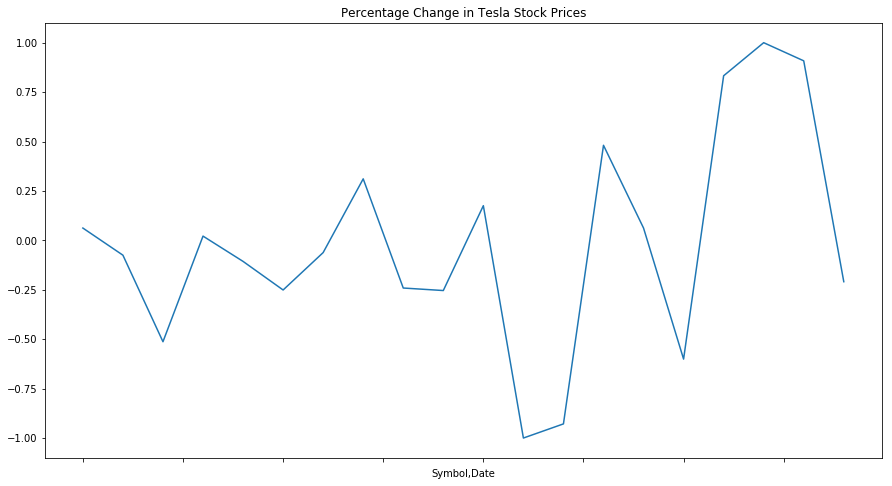

In [486]:
ax = tsla['Change norm'].plot(x='Date', figsize=(15,8), title='Percentage Change in Tesla Stock Prices')

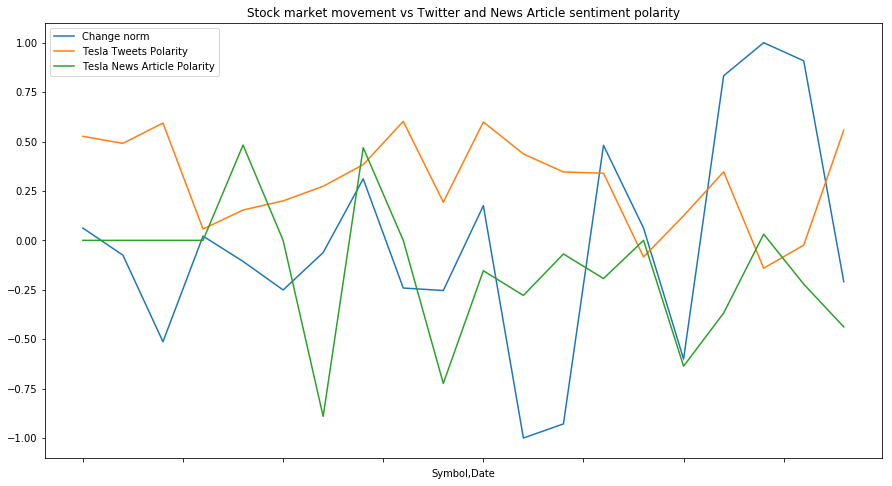

In [472]:
ax = tsla['Change norm'].plot(x='Date', figsize=(15,8), title='Stock market movement vs Twitter and News Article sentiment polarity')
ax.plot(tsla_twt, label='Tesla Tweets Polarity')
ax.plot(news_tsla_p, label='Tesla News Article Polarity')
ax.legend()

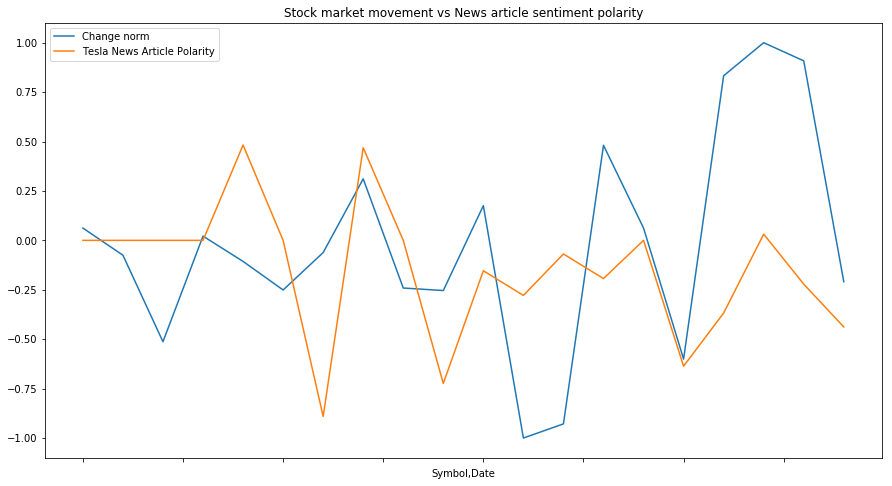

In [426]:
ax = tsla['Change norm'].plot(x='Date', figsize=(15,8), title='Stock market movement vs News article sentiment polarity')
ax.plot(news_tsla_p, label='Tesla News Article Polarity')
ax.legend()

### Getting the error between sentiment scores and closing difference

In [361]:
err_tsla_twt = sse(tsla_twt, tsla['Change norm'].values)
print(err_tsla_twt)

9.14589396689


In [362]:
err_tsla_news = sse(news_tsla_p, tsla['Change norm'].values)
err_tsla_news

7.2089298273912448

In [525]:
tsla['News'] = news_tsla_p
tsla['Tweet'] = tsla_twt
tsla['News Accuracy'] = get_accuracy(tsla,'News')
tsla['Tweet Accuracy'] = get_accuracy(tsla,'Tweet')
print(tsla['Tweet Accuracy'].value_counts())
print(tsla['News Accuracy'].value_counts())

False    14
True      6
Name: Tweet Accuracy, dtype: int64
False    12
True      8
Name: News Accuracy, dtype: int64


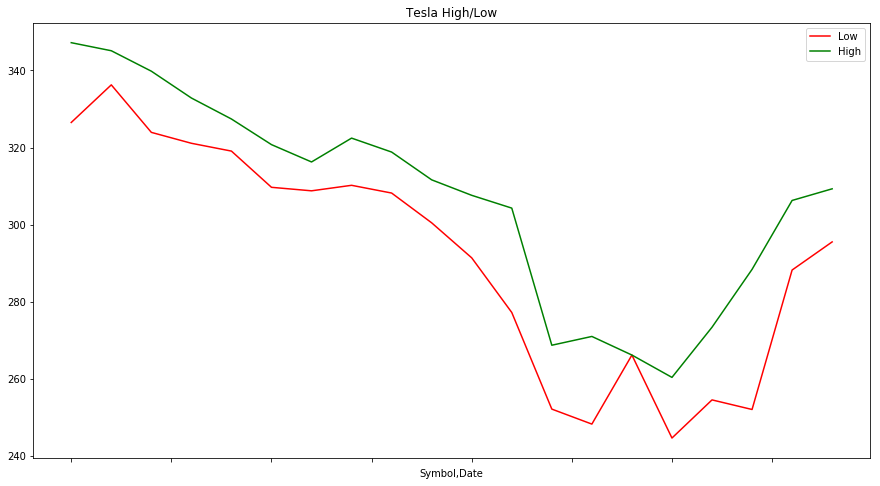

In [53]:
ax = tsla['Low'].plot(figsize=(15,8), title='Tesla High/Low', legend=True, color='red')
tsla['High'].plot(ax=ax, legend=True, color='Green')

## Apple

In [363]:
news_aapl

,Date,Score
0,2018-04-10,-0.074669
1,2018-04-09,0.190616
2,2018-04-08,0.107809
3,2018-04-07,0.885838
4,2018-04-06,-0.244968
5,2018-04-05,0.641346
6,2018-04-04,0.177230
7,2018-04-03,0.129225
8,2018-04-02,-0.419777
9,2018-04-01,-0.384658


In [421]:
#from 3/12 - 4/6
news_aapl_p = news_aapl['Score'].values[4:30][::-1]
news_aapl_p = remove_weekends(news_aapl_p)
print(news_aapl_p)
len(news_aapl_p)

[0.14351800000000001, -0.52374450000000006, -0.024989166666666663, -0.05356699999999999, -0.41672700000000007, -0.38682775000000003, -0.22726887999999995, 0.062900999999999999, 0.2870814285714286, 0.45377049999999997, 0.09843416666666667, 0.068906750000000003, -0.22283412499999999, 0.00093600000000001072, -0.21428549999999999, -0.41977728571428574, 0.1292251111111111, 0.17722966666666665, 0.64134599999999997, -0.24496825]


20

In [422]:
aapl = download_stocks('AAPL', start, end)
aapl

Close      High       Low     Open    Volume  \
Symbol Date                                                        
AAPL   2018-03-12  181.72  182.3900  180.2100  180.290  32207081   
       2018-03-13  179.97  183.5000  179.2400  182.590  31693529   
       2018-03-14  178.44  180.5200  177.8100  180.320  29368356   
       2018-03-15  178.65  180.2400  178.0701  178.500  22743798   
       2018-03-16  178.02  179.1200  177.6200  178.650  39404688   
       2018-03-19  175.30  177.4700  173.6600  177.320  33446771   
       2018-03-20  175.24  176.8000  174.9400  175.240  19649350   
       2018-03-21  171.27  175.0900  171.2600  175.040  37054935   
       2018-03-22  168.85  172.6800  168.6000  170.000  41490767   
       2018-03-23  164.94  169.9200  164.9400  168.390  41028784   
       2018-03-26  172.77  173.1000  166.4400  168.070  37541236   
       2018-03-27  168.34  175.1500  166.9200  173.680  40922579   
       2018-03-28  166.48  170.0200  165.1900  167.250  41668545   
       2018-03-29  167.78  171.7500  166.9000  167.805  38398505   
       2018-03-30  167.78  167.7800  167.7800  167.780         0   
       2018-04-02  166.68  168.9400  164.4700  167.880  37586791   
       2018-04-03  168.39  168.7455  164.8800  167.640  30278046   
       2018-04-04  171.61  172.0100  164.7700  164.880  34605489   
       2018-04-05  172.80  174.2304  172.0800  172.580  26933197   
       2018-04-06  168.38  172.4800  168.2000  170.970  35005290   

                   Close difference  Pct change  Change norm  
Symbol Date                                                   
AAPL   2018-03-12              0.00    0.000000    -0.298590  
       2018-03-13             -1.75   -0.009630    -0.562024  
       2018-03-14             -1.53   -0.008501    -0.531146  
       2018-03-15              0.21    0.001177    -0.266397  
       2018-03-16             -0.63   -0.003526    -0.395056  
       2018-03-19             -2.72   -0.015279    -0.716552  
       2018-03-20             -0.06   -0.000342    -0.307953  
       2018-03-21             -3.97   -0.022655    -0.918308  
       2018-03-22             -2.42   -0.014130    -0.685109  
       2018-03-23             -3.91   -0.023157    -0.932040  
       2018-03-26              7.83    0.047472     1.000000  
       2018-03-27             -4.43   -0.025641    -1.000000  
       2018-03-28             -1.86   -0.011049    -0.600837  
       2018-03-29              1.30    0.007809    -0.084982  
       2018-03-30              0.00    0.000000    -0.298590  
       2018-04-02             -1.10   -0.006556    -0.477935  
       2018-04-03              1.71    0.010259    -0.017951  
       2018-04-04              3.22    0.019122     0.224499  
       2018-04-05              1.19    0.006934    -0.108902  
       2018-04-06             -4.42   -0.025579    -0.998295

In [424]:
aapl_twt = twt.iloc[0].values[1:][::-1]
aapl_twt = remove_weekends(aapl_twt)
aapl_twt

20

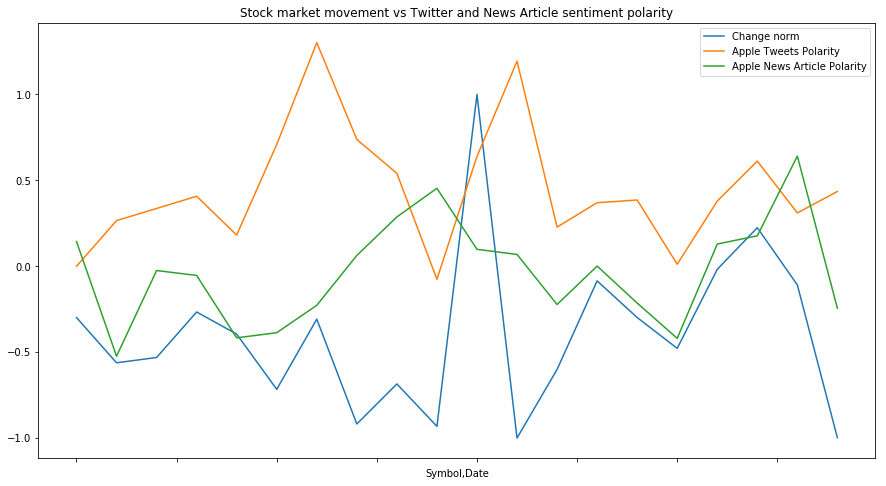

In [471]:
ax = aapl['Change norm'].plot(x='Date', figsize=(15,8), title='Stock market movement vs Twitter and News Article sentiment polarity')
ax.plot(aapl_twt, label='Apple Tweets Polarity')
ax.plot(news_aapl_p, label='Apple News Article Polarity')
ax.legend()

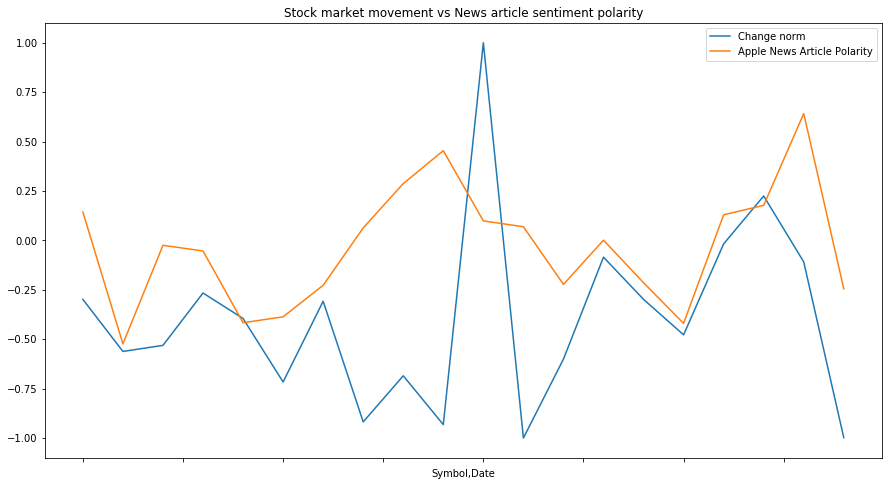

In [427]:
ax = aapl['Change norm'].plot(x='Date', figsize=(15,8), title='Stock market movement vs News article sentiment polarity')
ax.plot(news_aapl_p, label='Apple News Article Polarity')
ax.legend()

In [428]:
err_aapl_twt = sse(aapl_twt, aapl['Change norm'])
err_aapl_twt

20.99848641669178

In [429]:
err_aapl_news = sse(news_aapl_p, aapl['Change norm'])
err_aapl_news

7.712918491237669

In [531]:
aapl['News'] = news_aapl_p
aapl['Tweet'] = aapl_twt
aapl['News Accuracy'] = get_accuracy(aapl,'News')
aapl['Tweet Accuracy'] = get_accuracy(aapl,'Tweet')
print(aapl['Tweet Accuracy'].value_counts())
print(aapl['News Accuracy'].value_counts())

False    17
True      3
Name: Tweet Accuracy, dtype: int64
True     12
False     8
Name: News Accuracy, dtype: int64


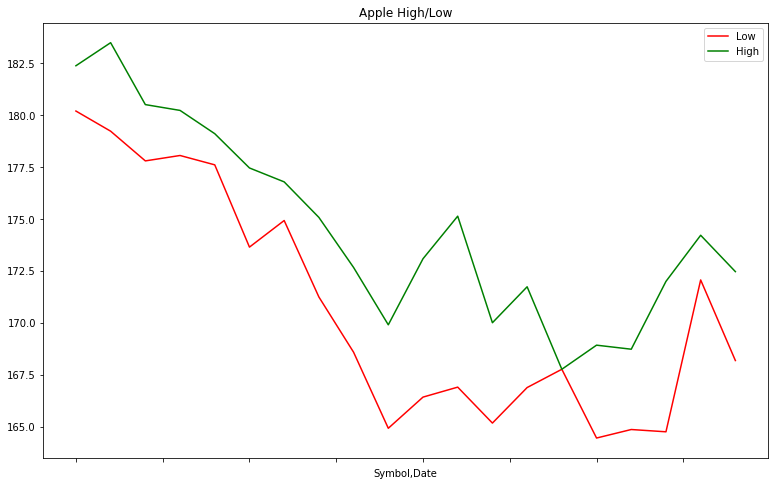

In [60]:
ax = aapl['Low'].plot(figsize=(13,8), title='Apple High/Low', legend=True, color='red')
aapl['High'].plot(ax=ax, legend=True, color='Green')

## BP

In [430]:
news_bp

,Date,Score
0,2018-04-10,0.000000
1,2018-03-29,-0.412903
2,2018-03-25,0.000000
3,2018-03-16,0.000000
4,2018-03-15,0.000000
5,2018-03-14,0.578318
6,2018-03-13,0.000000
7,2018-03-07,-0.759332
8,2018-02-27,-0.817850
9,2018-02-23,0.000000


In [446]:
news_bp_p = news_bp['Score'].values[::-1][-7:-1]
news_bp_p = np.insert(np.insert(news_bp_p, 0, 0.), 5, np.zeros(8))
news_bp_p = np.insert(news_bp_p,14, np.zeros(3))
news_bp_p = np.insert(news_bp_p,18, np.zeros(8) )
news_bp_p = remove_weekends(news_bp_p)
news_bp_p

[0.0,
 0.0,
 0.578318,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.41290299999999996,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [127]:
bp = download_stocks('BP', start, end)
bp.head()

Close    High    Low   Open   Volume  Close difference  \
Symbol Date                                                                 
BP     2018-03-12  39.85  39.880  39.58  39.68  3706000              0.00   
       2018-03-13  39.55  40.200  39.46  40.08  3517855             -0.30   
       2018-03-14  38.87  39.490  38.81  39.44  6302722             -0.68   
       2018-03-15  39.03  39.140  38.75  38.92  3976380              0.16   
       2018-03-16  39.48  39.615  39.07  39.11  4596504              0.45   

                   Pct change  Change norm  
Symbol Date                                 
BP     2018-03-12    0.000000    -0.095976  
       2018-03-13   -0.007528    -0.344260  
       2018-03-14   -0.017193    -0.663023  
       2018-03-15    0.004116     0.039781  
       2018-03-16    0.011530     0.284275

In [255]:
bp_twt = twt.iloc[3].values[1:][::-1]
bp_twt = remove_weekends(bp_twt)
bp_twt

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.45230993,  0.7330736 , -0.41453683,  0.30448496,  0.60796958,
        1.11605389,  0.58185392,  1.00818646,  0.37911105,  0.54655371])

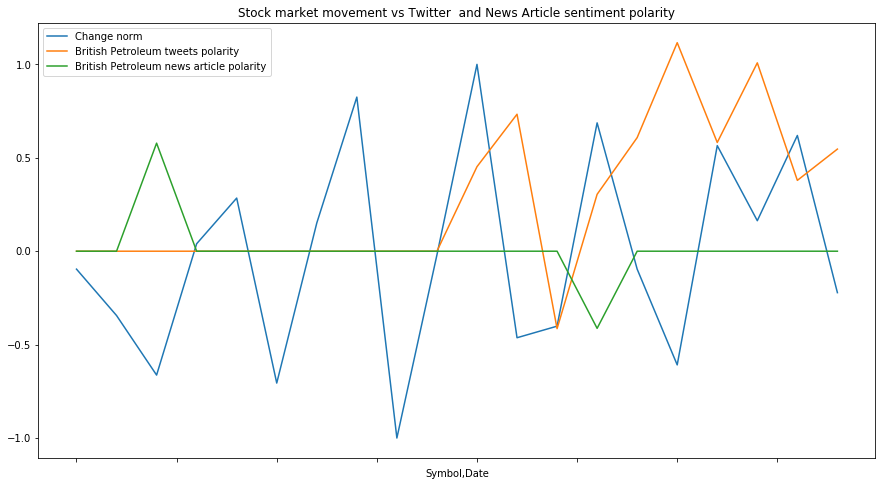

In [470]:
ax = bp['Change norm'].plot(x='Date', figsize=(15,8), title='Stock market movement vs Twitter  and News Article sentiment polarity')
ax.plot(bp_twt, label='British Petroleum tweets polarity')
ax.plot(news_bp_p, label='British Petroleum news article polarity')
ax.legend()

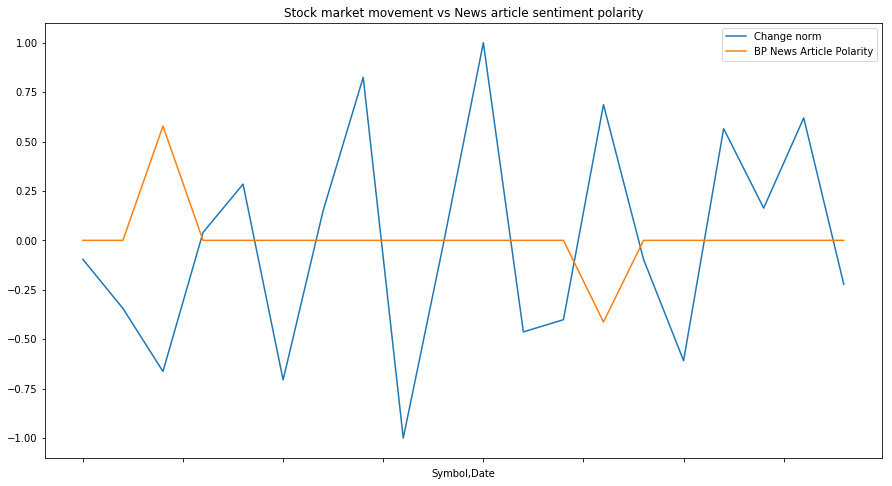

In [450]:
ax = bp['Change norm'].plot(x='Date', figsize=(15,8), title='Stock market movement vs News article sentiment polarity')
ax.plot(news_bp_p, label='BP News Article Polarity')
ax.legend()

In [448]:
err_bp_twt = sse(bp_twt, bp['Change norm'])
err_bp_twt

9.560703204420859

In [449]:
err_bp_news = sse(news_bp_p, bp['Change norm'])
err_bp_news

7.696188889223741

In [532]:
bp['News'] = news_bp_p
bp['Tweet'] = bp_twt
bp['News Accuracy'] = get_accuracy(bp,'News')
bp['Tweet Accuracy'] = get_accuracy(bp,'Tweet')
print(bp['Tweet Accuracy'].value_counts())
print(bp['News Accuracy'].value_counts())

False    14
True      6
Name: Tweet Accuracy, dtype: int64
False    20
Name: News Accuracy, dtype: int64


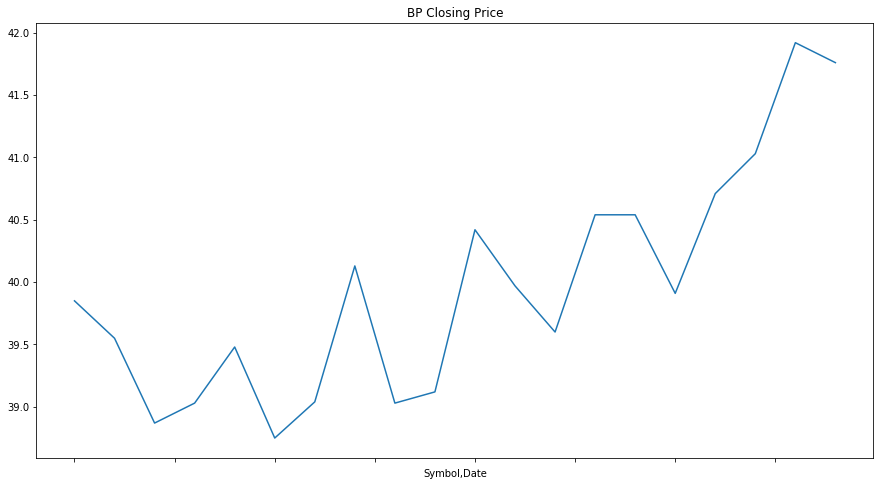

In [65]:
bp['Close'].plot(x='Date', figsize=(15,8), title='BP Closing Price')

## Goldman Sachs

In [451]:
news_gs

,Date,Score
0,2018-04-10,0.382474
1,2018-04-09,0.296449
2,2018-04-08,-0.317985
3,2018-04-06,-0.385410
4,2018-04-04,-0.294250
5,2018-04-02,0.159417
6,2018-03-30,-0.624922
7,2018-03-28,-0.375814
8,2018-03-26,-0.134243
9,2018-03-25,0.468438


In [489]:
news_gs_p = news_gs['Score'].values[::-1][48:-4]
news_gs_p = np.insert(np.insert(np.insert(np.insert(np.insert(np.insert(news_gs_p, 5, 0), 10, 0), 12, 0), 15, 0), 17, 0), 19, np.zeros(2))
news_gs_p = np.insert(np.insert(news_gs_p, 22, 0), 24, np.zeros(2))
news_gs_p = remove_weekends(news_gs_p)

In [129]:
gs = download_stocks('GS', start, end)
gs.head()

Close    High      Low    Open   Volume  Close difference  \
Symbol Date                                                                     
GS     2018-03-12  273.38  275.31  270.770  271.00  3065557              0.00   
       2018-03-13  268.53  275.03  267.440  274.34  2288103             -4.85   
       2018-03-14  264.43  270.78  263.911  270.40  2478684             -4.10   
       2018-03-15  266.61  269.00  265.350  265.72  2255191              2.18   
       2018-03-16  267.60  269.85  265.330  266.01  4114368              0.99   

                   Pct change  Change norm  
Symbol Date                                 
GS     2018-03-12    0.000000    -0.052289  
       2018-03-13   -0.017741    -0.528240  
       2018-03-14   -0.015268    -0.461906  
       2018-03-15    0.008244     0.168884  
       2018-03-16    0.003713     0.047331

In [468]:
gs_twt = twt.iloc[2].values[1:][::-1]
gs_twt = remove_weekends(gs_twt)
gs_twt

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.168730675,
 0.43428107999999999,
 0.8607954550000001,
 0.0,
 0.34744267999999995,
 0.55654121999999995,
 -0.0027418150000000003,
 0.31690086499999998,
 0.62308026500000002,
 0.40696969500000002]

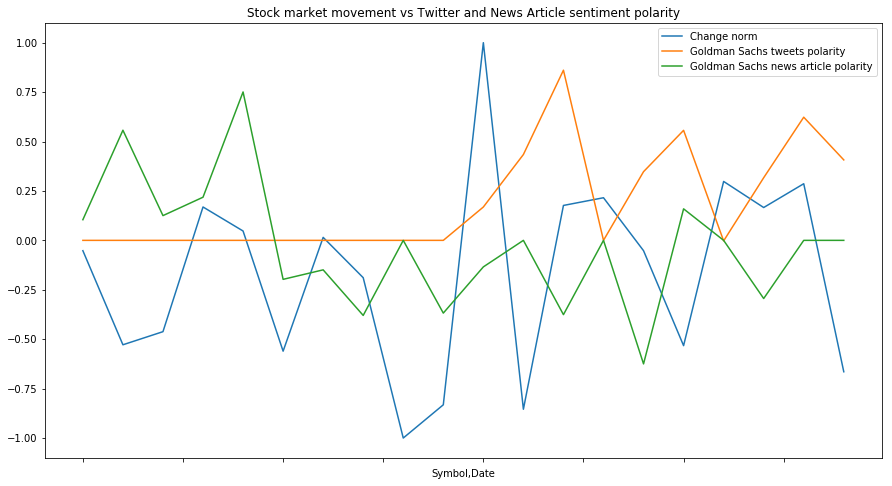

In [490]:
ax = gs['Change norm'].plot(x='Date', figsize=(15,8), title='Stock market movement vs Twitter and News Article sentiment polarity')
ax.plot(gs_twt, label='Goldman Sachs tweets polarity')
ax.plot(news_gs_p, label='Goldman Sachs news article polarity')
ax.legend()

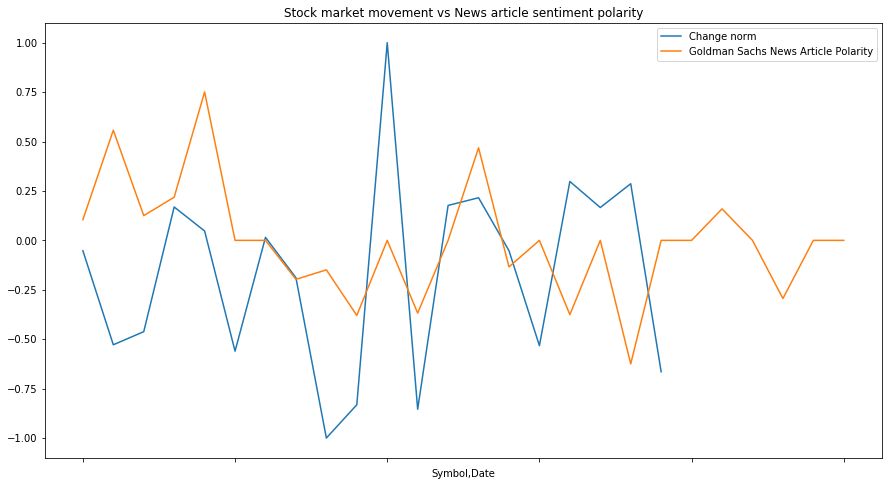

In [473]:
ax = gs['Change norm'].plot(x='Date', figsize=(15,8), title='Stock market movement vs News article sentiment polarity')
ax.plot(news_gs_p, label='Goldman Sachs News Article Polarity')
ax.legend()

In [487]:
err_gs_twt = sse(gs_twt, gs['Change norm'])
err_gs_twt

8.155430258674862

In [491]:
err_gs_news = sse(news_gs_p, gs['Change norm'])
err_gs_news

7.45499557291842

In [533]:
gs['News'] = news_gs_p
gs['Tweet'] = gs_twt
gs['News Accuracy'] = get_accuracy(gs,'News')
gs['Tweet Accuracy'] = get_accuracy(gs,'Tweet')
print(gs['Tweet Accuracy'].value_counts())
print(gs['News Accuracy'].value_counts())

False    16
True      4
Name: Tweet Accuracy, dtype: int64
False    14
True      6
Name: News Accuracy, dtype: int64


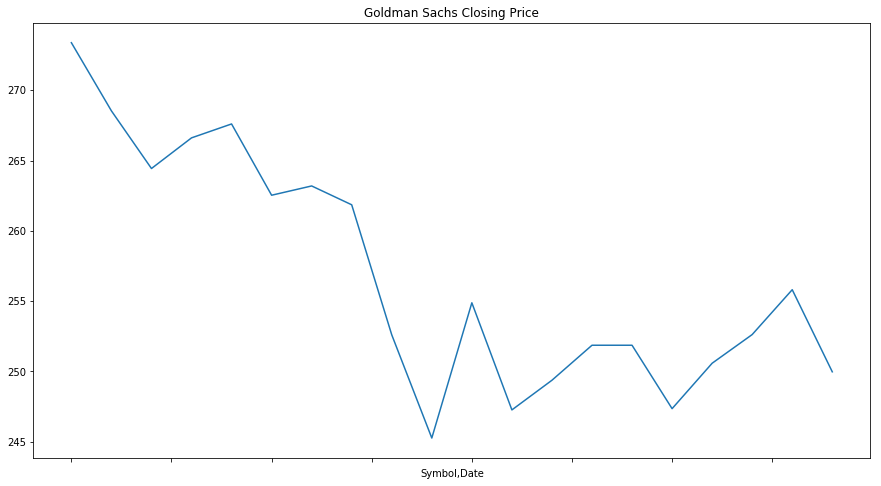

In [71]:
gs['Close'].plot(x='Date', figsize=(15,8), title='Goldman Sachs Closing Price')

## Looking at all 4 companies

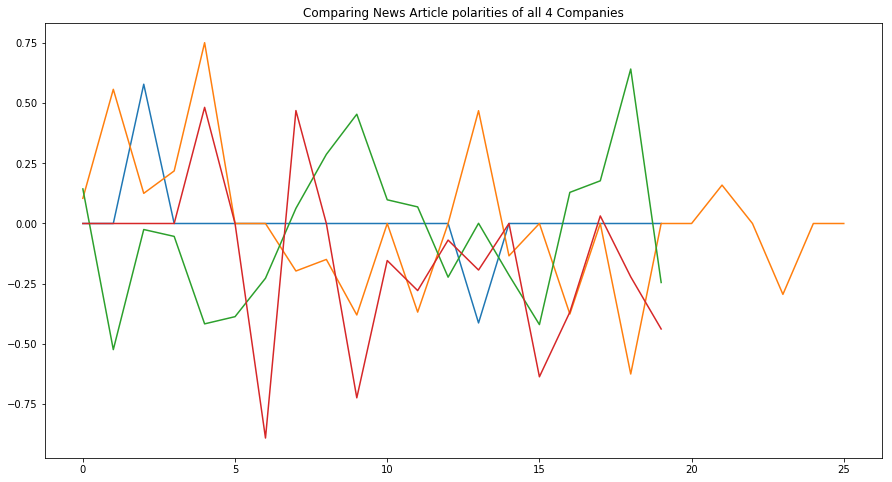

In [484]:
plt.figure(figsize=(15,8))
plt.title('Comparing News Article polarities of all 4 Companies')
plt.plot(news_bp_p, label='News article polarity of BP')
plt.plot(news_gs_p, label='News article polarity of Goldman Sachs')
plt.plot(news_aapl_p, label='News article polarity of Apple')
plt.plot(news_tsla_p, label='News article polarity of Tesla')